##Libraries

In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [10]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [1]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [2]:
import joblib
import os
import pickle
import numpy as np

#import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
from scipy.special import logit


##Load Models

###RF classifire

In [ ]:
input_list=[126, 160, 173, 184, 189, 119, 115, 115, 112, 111, 136, 167, 183, 113, 140, 170, 186, 123, 144, 167, 182, 245, 208, 178, 157, 139, 148, 106, 80, 59, 153, 108, 109, 121, 163, 118, 122, 134, 174, 138, 134, 140, 0, 4, 3, 1, 0, 1, -1, -3, -5, -3, -8, -10, -10, -8, -13, -12, -10, -12, -15, -14, -12]

# Load the model from the file
sign_rf_model = joblib.load('/content/drive/MyDrive/Work_space/Project/sign_language/python_file/random_forest_modelxyz1_1.joblib')
classes={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B',
        12: 'C', 13: 'D', 14: 'DEL', 15: 'E', 16: 'F', 17: 'G', 18: 'H', 19: 'I', 20: 'J', 21: 'K',
        22: 'L', 23: 'M', 24: 'N', 25: 'O', 26: 'P', 27: 'Q', 28: 'R', 29: 'S', 30: 'SPACE', 31: 'T',
        32: 'U', 33: 'V', 34: 'W', 35: 'X', 36: 'Y', 37: 'Z'}

def rf_model(input_list):

  predict=sign_rf_model.predict([input_list])
  print(classes[predict[0]])

  return classes[predict[0]]

[[0.1       ]
 [0.58571429]
 [0.77142857]
 [0.92857143]
 [1.        ]
 [0.        ]]


###RF classifire Scaled

In [ ]:
from typing_extensions import final
from joblib import dump, load
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

input_list=[126, 160, 173, 184, 189, 119, 115, 115, 112, 111, 136, 167, 183, 113, 140, 170, 186, 123, 144, 167, 182, 245, 208, 178, 157, 139, 148, 106, 80, 59, 153, 108, 109, 121, 163, 118, 122, 134, 174, 138, 134, 140, 0, 4, 3, 1, 0, 1, -1, -3, -5, -3, -8, -10, -10, -8, -13, -12, -10, -12, -15, -14, -12]

# Load the model from the file
sign_rf_model = joblib.load('/content/drive/MyDrive/Work_space/Project/Be my voice/API/app/sign_T_text/model/RF_scaled/random_forest_model_scaled_XYZ.joblib')



classes={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B',
        12: 'C', 13: 'D', 14: 'DEL', 15: 'E', 16: 'F', 17: 'G', 18: 'H', 19: 'I', 20: 'J', 21: 'K',
        22: 'L', 23: 'M', 24: 'N', 25: 'O', 26: 'P', 27: 'Q', 28: 'R', 29: 'S', 30: 'SPACE', 31: 'T',
        32: 'U', 33: 'V', 34: 'W', 35: 'X', 36: 'Y', 37: 'Z'}

def rf_scaled_model(input_list):
  # Create and fit the MinMaxScaler
  scaler_xy = MinMaxScaler(feature_range=(0, 300))
  scaler_z = MinMaxScaler(feature_range=(-100,100))


  data_x = np.array(input_list[:21]).reshape(-1, 1)
  data_y = np.array(input_list[21:42]).reshape(-1, 1)
  data_z = np.array(input_list[42:]).reshape(-1, 1)

  # Create and fit the MinMaxScaler
  scaled_x = scaler_xy.fit_transform(data_x)
  scaled_x = scaled_x.flatten().tolist()

  # Create and fit the MinMaxScaler
  scaled_y = scaler_xy.fit_transform(data_y)
  scaled_y = scaled_y.flatten().tolist()

  # Create and fit the MinMaxScaler
  scaled_z = scaler_z.fit_transform(data_z)
  scaled_z = scaled_z.flatten().tolist()

  final_list=[]
  final_list.extend(scaled_x)
  final_list.extend(scaled_y)
  final_list.extend(scaled_z)

  print(final_list)
  predict=sign_rf_model.predict([input_list])
  print(classes[predict[0]])

  return classes[predict[0]]

In [ ]:
input_list=[126, 160, 173, 184, 189, 119, 115, 115, 112, 111, 136, 167, 183, 113, 140, 170, 186, 123, 144, 167, 182, 245, 208, 178, 157, 139, 148, 106, 80, 59, 153, 108, 109, 121, 163, 118, 122, 134, 174, 138, 134, 140, 0, 4, 3, 1, 0, 1, -1, -3, -5, -3, -8, -10, -10, -8, -13, -12, -10, -12, -15, -14, -12]
rf_scaled_model(input_list)

[57.69230769230768, 188.4615384615384, 238.4615384615384, 280.7692307692308, 299.99999999999994, 30.769230769230717, 15.384615384615358, 15.384615384615358, 3.846153846153811, 0.0, 96.15384615384613, 215.38461538461542, 276.92307692307685, 7.692307692307679, 111.53846153846149, 226.92307692307685, 288.4615384615384, 46.15384615384613, 126.92307692307685, 215.38461538461542, 273.07692307692304, 300.0, 240.32258064516125, 191.93548387096772, 158.06451612903226, 129.03225806451613, 143.54838709677418, 75.80645161290323, 33.87096774193549, 0.0, 151.61290322580643, 79.03225806451613, 80.64516129032256, 100.0, 167.74193548387095, 95.16129032258064, 101.61290322580643, 120.96774193548387, 185.48387096774192, 127.41935483870967, 120.96774193548387, 130.64516129032256, 57.89473684210526, 100.0, 89.47368421052632, 68.42105263157895, 57.89473684210526, 68.42105263157895, 47.368421052631575, 26.315789473684205, 5.263157894736835, 26.315789473684205, -26.31578947368422, -47.36842105263159, -47.3684

'D'

###LSTM_Model

In [ ]:
from keras.models import load_model
# Load the model
sign_LSTM_model = load_model('/content/sign_language.hdf5')

classes_2=['0' ,'1', '2' ,'3', '4', '5' ,'6' ,'7' ,'8', '9', 'A' ,'B', 'C', 'D' ,'DEL', 'E' ,'F', 'G',
  'H' ,'I' ,'J' ',K' ,'L' ,'M' ,'N' ,'O' ,'P' ,'Q' ,'R', 'S', 'SPACE', 'T', 'U', 'V' ,'W',
  'X' ,'Y' ,'Z']
def LSTM_model(input_list,tresh=0.5):

  list_pre = np.expand_dims(input_list, axis=0)
  list_pre = np.expand_dims(list_pre, axis=-1)

  predict=sign_LSTM_model.predict(list_pre)
  #print(predict)

  pred=zip(classes_2,predict[0])
  pre_dict = dict(pred)
  final_dict={}

  for i in range(len(pre_dict)):
    if list(pre_dict.values())[i] >= tresh:
      final_dict[list(pre_dict.keys())[i]]=list(pre_dict.values())[i]
    else:
      pass

  #print(final_dict)
  if final_dict is not None:
    # Sort the dictionary by values
    sorted_dict = dict(sorted(final_dict.items(), key=lambda item: item[1],reverse=True))
    #print(list(sorted_dict.items())[0])
    return list(sorted_dict.items())[0]
  else:
    return None





In [ ]:
input_list=[126, 160, 173, 184, 189, 119, 115, 115, 112, 111, 136, 167, 183, 113, 140, 170, 186, 123, 144, 167, 182, 245, 208, 178, 157, 139, 148, 106, 80, 59, 153, 108, 109, 121, 163, 118, 122, 134, 174, 138, 134, 140, 0, 4, 3, 1, 0, 1, -1, -3, -5, -3, -8, -10, -10, -8, -13, -12, -10, -12, -15, -14, -12]

LSTM_model(input_list)
rf_model(input_list)



1/1 [==============================] - 1s 553ms/step
D


'D'

###scaled LSTM

In [9]:
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Load the model
sign_LSTM_Scaled_model = load_model('/content/drive/MyDrive/Work_space/Project/Be my voice/API/app/sign_T_text/model/LSTM_scaled/sign_language_2.hdf5')

classes_2=['0' ,'1', '2' ,'3', '4', '5' ,'6' ,'7' ,'8', '9', 'A' ,'B', 'C', 'D' ,'DEL', 'E' ,'F', 'G',
  'H' ,'I' ,'J' ',K' ,'L' ,'M' ,'N' ,'O' ,'P' ,'Q' ,'R', 'S', 'SPACE', 'T', 'U', 'V' ,'W',
  'X' ,'Y' ,'Z']

def LSTM_Scaled_model(input_list,tresh=0.005):

  # Create and fit the MinMaxScaler
  scaler_xy = MinMaxScaler(feature_range=(0, 300))
  scaler_z = MinMaxScaler(feature_range=(-100,100))


  data_x = np.array(input_list[:21]).reshape(-1, 1)
  data_y = np.array(input_list[21:42]).reshape(-1, 1)
  data_z = np.array(input_list[42:]).reshape(-1, 1)

  # Create and fit the MinMaxScaler
  scaled_x = scaler_xy.fit_transform(data_x)
  scaled_x = scaled_x.flatten().tolist()

  # Create and fit the MinMaxScaler
  scaled_y = scaler_xy.fit_transform(data_y)
  scaled_y = scaled_y.flatten().tolist()

  # Create and fit the MinMaxScaler
  scaled_z = scaler_z.fit_transform(data_z)
  scaled_z = scaled_z.flatten().tolist()

  final_list=[]
  final_list.extend(scaled_x)
  final_list.extend(scaled_y)
  final_list.extend(scaled_z)

  list_pre = np.expand_dims(final_list, axis=0)
  list_pre = np.expand_dims(list_pre, axis=-1)

  predict=sign_LSTM_Scaled_model.predict(list_pre)
  # Get the index of the maximum value
  max_index = np.argmax(predict)
  print(classes_2[max_index])

  #pred=zip(classes_2,predict[0])
  #pre_dict = dict(pred)
  #final_dict={}

  #for i in range(len(pre_dict)):
   # if list(pre_dict.values())[i] >= tresh:
   #   final_dict[list(pre_dict.keys())[i]]=list(pre_dict.values())[i]
    #else:
    #  pass

  #print(final_dict)
  #if final_dict is not None:
   # # Sort the dictionary by values
   # sorted_dict = dict(sorted(final_dict.items(), key=lambda item: item[1],reverse=True))
    #print(list(sorted_dict.items())[0])
    #return list(sorted_dict.items())[0]

  return predict
  #else:
   # return None





In [10]:
input_list=[126, 160, 173, 184, 189, 119, 115, 115, 112, 111, 136, 167, 183, 113, 140, 170, 186, 123, 144, 167, 182, 245, 208, 178, 157, 139, 148, 106, 80, 59, 153, 108, 109, 121, 163, 118, 122, 134, 174, 138, 134, 140, 0, 4, 3, 1, 0, 1, -1, -3, -5, -3, -8, -10, -10, -8, -13, -12, -10, -12, -15, -14, -12]

LSTM_Scaled_model(input_list)

1/1 [==============================] - 1s 840ms/step
D


array([[5.1636041e-05, 4.9805844e-06, 1.8623157e-06, 5.4648567e-06,
        9.6542301e-08, 6.5993066e-07, 2.6338196e-07, 3.8738149e-06,
        3.0167705e-05, 1.2221714e-05, 7.1428881e-06, 1.1822358e-06,
        1.3450638e-04, 9.9370229e-01, 5.6943563e-06, 9.6773774e-06,
        8.3535188e-06, 6.0336992e-05, 1.4179958e-06, 7.3311722e-04,
        1.6025408e-06, 2.2311555e-05, 1.4134661e-06, 7.9718120e-06,
        1.8942164e-05, 1.8778443e-04, 1.0110381e-05, 7.1751070e-04,
        3.1123045e-03, 7.1993836e-06, 2.7849115e-04, 4.4783451e-06,
        2.1677952e-04, 4.1870389e-04, 2.7583562e-07, 1.9016383e-04,
        1.0865785e-06, 2.7918559e-05]], dtype=float32)

###CNN model google ai


In [ ]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


# Load the model
sign_LSTM_model = load_model('/content/drive/MyDrive/Work_space/Project/Be my voice/API/app/sign_T_text/model/CNN_sign_language/CNN_sign_language.hdf5')

classes_3=['A', 'B', 'C' ,'D' ,'E' ,'F', 'G' ,'H' ,'I', 'J' ,'K' ,'L' ,'M', 'N' ,'O' ,'P', 'Q' ,'R',
 'S' ,'T' ,'U' ,'V' ,'W' ,'X' ,'Y' ,'Z' ,'del' ,'space']

def CNN_model(image_path,tresh=0.01):
  input_shape = (224, 224, 3)

  image=cv2.imread(image_path)
  # Resize, scale and reshape image before making predictions
  resized = cv2.resize(image, (224,224))
  resized = (resized / 255.0).reshape(-1,input_shape[1],input_shape[0],input_shape[2])
  cv2_imshow((resized[0] * 255).astype(np.uint8))

  predict=sign_LSTM_model.predict(resized)
  #print(predict)

  pred=zip(classes_3,predict[0])
  pre_dict = dict(pred)
  final_dict={}

  for i in range(len(pre_dict)):
    if list(pre_dict.values())[i] >= tresh:
      final_dict[list(pre_dict.keys())[i]]=list(pre_dict.values())[i]
    else:
      pass

  #print(final_dict)
  if final_dict is not None:
    # Sort the dictionary by values
    sorted_dict = dict(sorted(final_dict.items(), key=lambda item: item[1],reverse=True))
    #print(list(sorted_dict.items()))
    return list(sorted_dict.items())
  else:
    return None






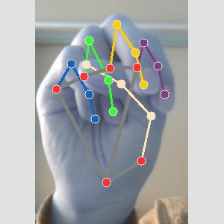

1/1 [==============================] - 0s 297ms/step


[('N', 0.14339319), ('B', 0.10810509), ('Q', 0.08291485)]

In [ ]:
# CNN_model("/content/Q (966).jpg")
CNN_model("/content/62.jpg")


###sign to text model.py

In [ ]:
%%writefile sign_t_text_model.py
import os
import numpy as np
import joblib
from keras.models import load_model
from typing_extensions import final
from joblib import dump, load
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import cv2
from google.colab.patches import cv2_imshow



# Load the model from the file
sign_rf_model = joblib.load('/content/drive/MyDrive/Work_space/Project/sign_language/python_file/random_forest_modelxyz1_1.joblib')

classes={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B',
        12: 'C', 13: 'D', 14: 'DEL', 15: 'E', 16: 'F', 17: 'G', 18: 'H', 19: 'I', 20: 'J', 21: 'K',
        22: 'L', 23: 'M', 24: 'N', 25: 'O', 26: 'P', 27: 'Q', 28: 'R', 29: 'S', 30: 'SPACE', 31: 'T',
        32: 'U', 33: 'V', 34: 'W', 35: 'X', 36: 'Y', 37: 'Z'}

# Load the model
sign_LSTM_model = load_model('/content/sign_language.hdf5')

classes_2=['0' ,'1', '2' ,'3', '4', '5' ,'6' ,'7' ,'8', '9', 'A' ,'B', 'C', 'D' ,'DEL', 'E' ,'F', 'G',
  'H' ,'I' ,'J' ',K' ,'L' ,'M' ,'N' ,'O' ,'P' ,'Q' ,'R', 'S', 'SPACE', 'T', 'U', 'V' ,'W',
  'X' ,'Y' ,'Z']


def rf_model(input_list):

  predict=sign_rf_model.predict([input_list])
  print(classes[predict[0]])

  return classes[predict[0]]



def LSTM_model(input_list,tresh=0.5):

  list_pre = np.expand_dims(input_list, axis=0)
  list_pre = np.expand_dims(list_pre, axis=-1)

  predict=sign_LSTM_model.predict(list_pre)
  #print(predict)

  pred=zip(classes_2,predict[0])
  pre_dict = dict(pred)
  final_dict={}

  for i in range(len(pre_dict)):
    if list(pre_dict.values())[i] >= tresh:
      final_dict[list(pre_dict.keys())[i]]=list(pre_dict.values())[i]
    else:
      pass

  #print(final_dict)
  if final_dict is not None:
    # Sort the dictionary by values
    sorted_dict = dict(sorted(final_dict.items(), key=lambda item: item[1],reverse=True))
    #print(list(sorted_dict.items())[0])
    return list(sorted_dict.items())[0]
  else:
    return None





# Load the model
sign_CNN_model = load_model('/content/drive/MyDrive/Work_space/Project/Be my voice/API/app/sign_T_text/model/CNN_sign_language/CNN_sign_language.hdf5')

classes_3=['A', 'B', 'C' ,'D' ,'E' ,'F', 'G' ,'H' ,'I', 'J' ,'K' ,'L' ,'M', 'N' ,'O' ,'P', 'Q' ,'R',
 'S' ,'T' ,'U' ,'V' ,'W' ,'X' ,'Y' ,'Z' ,'del' ,'space']

def CNN_model(image_path,tresh=0.01):
  input_shape = (224, 224, 3)

  image=cv2.imread(image_path)
  # Resize, scale and reshape image before making predictions
  resized = cv2.resize(image, (224,224))
  resized = (resized / 255.0).reshape(-1,input_shape[1],input_shape[0],input_shape[2])
  cv2_imshow((resized[0] * 255).astype(np.uint8))

  predict=sign_CNN_model.predict(resized)
  #print(predict)

  pred=zip(classes_3,predict[0])
  pre_dict = dict(pred)
  final_dict={}

  for i in range(len(pre_dict)):
    if list(pre_dict.values())[i] >= tresh:
      final_dict[list(pre_dict.keys())[i]]=list(pre_dict.values())[i]
    else:
      pass

  #print(final_dict)
  if final_dict is not None:
    # Sort the dictionary by values
    sorted_dict = dict(sorted(final_dict.items(), key=lambda item: item[1],reverse=True))
    #print(list(sorted_dict.items()))
    return list(sorted_dict.items())
  else:
    return None




# Load the model from the file
sign_rf_model = joblib.load('/content/drive/MyDrive/Work_space/Project/Be my voice/API/app/sign_T_text/model/RF_scaled/random_forest_model_scaled_XYZ.joblib')


def rf_scaled_model(input_list):
  # Create and fit the MinMaxScaler
  scaler_xy = MinMaxScaler(feature_range=(0, 300))
  scaler_z = MinMaxScaler(feature_range=(-100,100))


  data_x = np.array(input_list[:21]).reshape(-1, 1)
  data_y = np.array(input_list[21:42]).reshape(-1, 1)
  data_z = np.array(input_list[42:]).reshape(-1, 1)

  # Create and fit the MinMaxScaler
  scaled_x = scaler_xy.fit_transform(data_x)
  scaled_x = scaled_x.flatten().tolist()

  # Create and fit the MinMaxScaler
  scaled_y = scaler_xy.fit_transform(data_y)
  scaled_y = scaled_y.flatten().tolist()

  # Create and fit the MinMaxScaler
  scaled_z = scaler_z.fit_transform(data_z)
  scaled_z = scaled_z.flatten().tolist()

  final_list=[]
  final_list.extend(scaled_x)
  final_list.extend(scaled_y)
  final_list.extend(scaled_z)

  print(final_list)
  predict=sign_rf_model.predict([input_list])
  print(classes[predict[0]])

  return classes[predict[0]]

Writing sign_t_text_model.py


##Inference

In [ ]:
%%writefile sign_to_text.py
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def resize_with_padding(image, desired_size):
    # Load the image
    #image = cv2.imread(image_path)

    # Get the current dimensions
    h, w = image.shape[:2]

    # Calculate the aspect ratio
    aspect_ratio = w / h
    # Determine new dimensions keeping the aspect ratio
    if aspect_ratio > 1:  # width is greater than height
        new_w = desired_size[0]
        new_h = int(new_w / aspect_ratio)
    elif aspect_ratio == 1:
        new_w = desired_size[0]
        new_h = desired_size[0]
    else:  # height is greater than width
        new_h = desired_size[1]
        new_w = int(new_h * aspect_ratio)

    # Resize the image
    resized_image = cv2.resize(image, (new_w, new_h))

    # Calculate padding to make the image the desired size
    delta_w = desired_size[0] - new_w
    delta_h = desired_size[1] - new_h
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    # Pad the image
    color = [0,0,0]  # Padding color (white)
    padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

    return padded_image

Writing sign_to_text.py


In [ ]:
!pip show joblib

Name: joblib
Version: 1.4.2
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: imbalanced-learn, librosa, mlxtend, music21, nltk, scikit-learn


images (1).jpeg
ok
D
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 [==============================] - 0s 36ms/step
D ('D', 0.99716467)


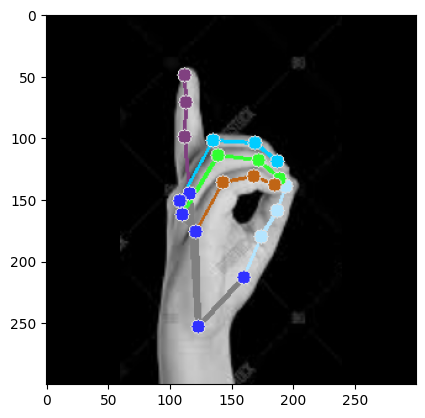

In [ ]:

# Initialize MediaPipe Hands and drawing utilities
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

cutoff=30
desired_size=(300,300,3)


# Initialize the Hands model
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.3)

#print(os.path.join(root_folder,folder,file))
image_path='/content/images (1).jpeg'
file_name=image_path.split("/")[-1]
print(file_name)


# Read an image
#image_path = '/content/hand1_b_left_seg_1_cropped.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#cv2_imshow(image_rgb)

# Process the image to detect hand landmarks
results = hands.process(image_rgb)

# Check if any hands are detected
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # Get the landmarks
        landmarks = hand_landmarks.landmark
        #print(landmarks)
        h, w, _ = image_rgb.shape
        #print(h,w)

        for i, landmark in enumerate(landmarks):
            x, y, z = int(landmark.x * w), int(landmark.y * h), landmark.z
            #print(f"Landmark {i}: (x: {x}, y: {y}, z: {z})")

        # Initialize bounding box coordinates
        min_x, min_y = w, h
        max_x, max_y = 0, 0

        # Iterate through landmarks to find the bounding box
        for landmark in landmarks:
            x, y = int(landmark.x * w), int(landmark.y * h)
            min_x, min_y = min(min_x, x), min(min_y, y)
            max_x, max_y = max(max_x, x), max(max_y, y)



        #Define X Y margine
        if min_x-cutoff < 0:
          minx=0
        else:
          minx=min_x-cutoff

        if min_y-cutoff < 0:
          miny=0
        else:
          miny=min_y-cutoff

        if max_x+cutoff > w:
          maxx=max_x
        else:
          maxx=max_x+cutoff

        if max_y+cutoff > h:
          maxy=max_y
        else:
          maxy=max_y+cutoff

        # Draw the bounding box
        #cv2.rectangle(image_rgb , (minx, miny), (maxx, maxy), (0, 255, 0), 2)
        #cv2_imshow(image)

        # Crop the image to the bounding box
        cropped_image = image_rgb [miny:maxy,minx:maxx]
        #cv2_imshow(cropped_image)

        #resize image
        resize_image=resize_with_padding(cropped_image, desired_size)

        ##############GEt needa the land mark in image#######################

        # Process the image to detect hand landmarks
        results2 = hands.process(resize_image)

        # Check if any hands are detected
        if results2.multi_hand_landmarks:
          print("ok")


          for hand_landmarks2 in results2.multi_hand_landmarks:
              # Get the landmarks
              landmarks2 = hand_landmarks2.landmark
              #print(landmarks)
              h2, w2, _ = resize_image.shape
              #print(h2,w2)

              #define x y storage location
              x_lists = []
              y_lists = []
              z_lists = []

              for i, landmark in enumerate(landmarks2):
                x, y, z = int(landmark.x * w2), int(landmark.y * h2), int(landmark.z*100)
                x_lists.append(x)
                y_lists.append(y)
                z_lists.append(z)
                #print(f"Landmark {i}: (x: {x}, y: {y}, z: {z})")

              list_pred=[]
              list_pred.extend(x_lists)
              list_pred.extend(y_lists)
              list_pred.extend(z_lists)


              charecter_rf=rf_model(list_pred)
              charecter_lstm=LSTM_model(list_pred)

              print(charecter_rf,charecter_lstm)


              # Optional: Draw landmarks and connections
              mp_drawing.draw_landmarks(
                  resize_image,hand_landmarks2, mp_hands.HAND_CONNECTIONS,
                  mp_drawing_styles.get_default_hand_landmarks_style(),
                  mp_drawing_styles.get_default_hand_connections_style())


              # Display the output image with bounding box
              plt.imshow(resize_image)
              #plt.show()


In [ ]:
print(list_pred)

[126, 160, 173, 184, 189, 119, 115, 115, 112, 111, 136, 167, 183, 113, 140, 170, 186, 123, 144, 167, 182, 245, 208, 178, 157, 139, 148, 106, 80, 59, 153, 108, 109, 121, 163, 118, 122, 134, 174, 138, 134, 140, 0, 4, 3, 1, 0, 1, -1, -3, -5, -3, -8, -10, -10, -8, -13, -12, -10, -12, -15, -14, -12]
